In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_excel("patient_details.xlsx")
df

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,...,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
0,1,OP1,yes,male,65,NaN,1.64592,65,yes,no,...,no,0.2,normal,normal,-1.98,0.73,23.993627,knee,normal weight,osteopenia
1,2,OP2,yes,female,54,46.0,1.67640,78,no,no,...,no,1.0,normal,"G.B rem, B.P",-2.26,-2.71,27.754876,knee,over weight,osteopenia
2,3,OP3,yes,female,49,43.0,1.37160,59,no,no,...,no,1.0,low protiens,no,-1.92,-1.51,31.361517,knee,obesity,osteopenia
3,4,OP4,yes,female,57,40.0,1.52400,72,no,no,...,no,2.0,low fats,uterus removed,-2.23,-1.13,31.000062,knee,obesity,osteopenia
4,5,OP5,yes,female,40,NaN,1.49352,54,no,no,...,no,2.0,normal,depression,-1.81,-1.05,24.208711,knee,normal weight,osteopenia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,OP152,yes,female,56,NaN,1.54000,80,no,no,...,yes,0.2,normal,"scizerian, b.p",-1.97,-1.34,33.732501,knee,obesity,osteopenia
236,237,OS49,yes,male,55,NaN,1.53000,63,no,no,...,no,6.0,normal,heart,-2.99,-2.42,26.912726,knee,over weight,osteoporosis
237,238,OP153,yes,male,49,NaN,1.67000,88,no,no,...,yes,0.5,normal,"G.B rem, fatty liver",-1.72,-1.21,31.553659,knee,obesity,osteopenia
238,239,OP154,yes,female,56,48.0,1.52000,68,no,no,...,yes,0.2,"low fats,proteins","G.B& uterus rem, intestine surgery",-2.01,-1.13,29.432133,knee,overweight,osteopenia


<Axes: xlabel='Joint Pain:', ylabel='Age'>

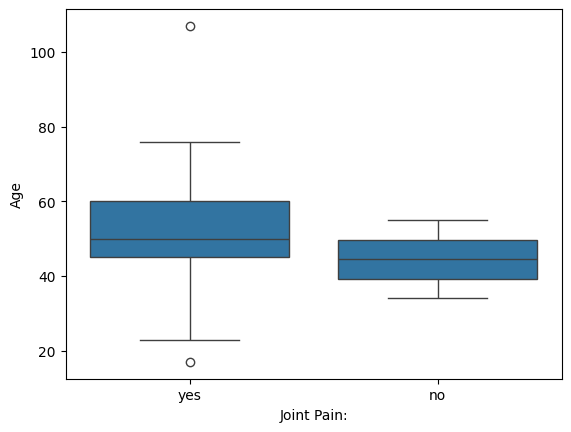

In [ ]:
base_color = sb.color_palette()[0]
sb.boxplot(data=df, x='Joint Pain:', y='Age', color=base_color)


In [ ]:
df.isna().sum()

,0
S.No,0
Patient Id,0
Joint Pain:,0
Gender,0
Age,0
Menopause Age,157
height (meter),0
Weight (KG),0
Smoker,0
Alcoholic,0


In [ ]:
# Fill null values in specific columns with their mean
#df['Menopause Age'] = df['Menopause Age'].fillna(df['Menopause Age'].median())
#df['Number of Pregnancies'] = df['Number of Pregnancies'].fillna(df['Number of Pregnancies'].median())

df['Maximum Walking distance (km)'] = df['Mafximum Walking distance (km)'].fillna(df['Maximum Walking distance (km)'].median())
# Fill null values in categorical columns with their mode
df['Daily Eating habits'] = df['Daily Eating habits'].fillna(df['Daily Eating habits'].mode().iloc[0])
#df['Occupation '] = df['Occupation '].fillna(df['Occupation '].mode().iloc[0])

df.loc[df['Gender'] == 1, ['Menopause Age', 'Number of Pregnancies']] = 0

#don't run this cell

In [ ]:

df.columns = df.columns.str.strip()

columns_to_encode = [ 'Daily Eating habits', 'Medical History', 'Obesity']

encoded_df = pd.get_dummies(df, columns=columns_to_encode)



encoded_df

KeyError: "None of [Index(['Daily Eating habits', 'Medical History', 'Obesity'], dtype='object')] are in the [columns]"

In [ ]:
encoded_df.to_excel("modifsfaied.xlsx", index=False)

In [ ]:
df.isna().sum()

,0
S.No,0
Patient Id,0
Joint Pain:,0
Gender,0
Age,0
Menopause Age,157
height (meter),0
Weight (KG),0
Smoker,0
Alcoholic,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Joint Pain:', 'Gender', 'Smoker','Alcoholic','Diabetic','Hypothyroidism','Seizer Disorder' , 'Estrogen Use' , 'Dialysis:','Family History of Osteoporosis']

for col in columns_to_encode:

    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

df


,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,...,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
0,1,OP1,1,1,65,NaN,1.64592,65,1,0,...,0,0.2,normal,normal,-1.98,0.73,23.993627,knee,normal weight,osteopenia
1,2,OP2,1,0,54,46.0,1.67640,78,0,0,...,0,1.0,normal,"G.B rem, B.P",-2.26,-2.71,27.754876,knee,over weight,osteopenia
2,3,OP3,1,0,49,43.0,1.37160,59,0,0,...,0,1.0,low protiens,no,-1.92,-1.51,31.361517,knee,obesity,osteopenia
3,4,OP4,1,0,57,40.0,1.52400,72,0,0,...,0,2.0,low fats,uterus removed,-2.23,-1.13,31.000062,knee,obesity,osteopenia
4,5,OP5,1,0,40,NaN,1.49352,54,0,0,...,0,2.0,normal,depression,-1.81,-1.05,24.208711,knee,normal weight,osteopenia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,OP152,1,0,56,NaN,1.54000,80,0,0,...,1,0.2,normal,"scizerian, b.p",-1.97,-1.34,33.732501,knee,obesity,osteopenia
236,237,OS49,1,1,55,NaN,1.53000,63,0,0,...,0,6.0,normal,heart,-2.99,-2.42,26.912726,knee,over weight,osteoporosis
237,238,OP153,1,1,49,NaN,1.67000,88,0,0,...,1,0.5,normal,"G.B rem, fatty liver",-1.72,-1.21,31.553659,knee,obesity,osteopenia
238,239,OP154,1,0,56,48.0,1.52000,68,0,0,...,1,0.2,"low fats,proteins","G.B& uterus rem, intestine surgery",-2.01,-1.13,29.432133,knee,overweight,osteopenia


In [ ]:

df.columns = df.columns.str.strip()

columns_to_encode = ['Occupation', 'Daily Eating habits', 'Medical History', 'Obesity']

encoded_df = pd.get_dummies(df, columns=columns_to_encode)

df = pd.concat([df, encoded_df], axis=1)

df

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,...,"Medical History_uterus rem, breast surg, seizer(2)","Medical History_uterus rem, dense elbow surgery",Medical History_uterus removed,"Medical History_uterus remover, disk, seizer",Medical History_vertebral surgery,Obesity_normal weight,Obesity_obesity,Obesity_over weight,Obesity_overweight,Obesity_under weight
0,1,OP1,1,1,65,NaN,1.64592,65,1,0,...,False,False,False,False,False,True,False,False,False,False
1,2,OP2,1,0,54,46.0,1.67640,78,0,0,...,False,False,False,False,False,False,False,True,False,False
2,3,OP3,1,0,49,43.0,1.37160,59,0,0,...,False,False,False,False,False,False,True,False,False,False
3,4,OP4,1,0,57,40.0,1.52400,72,0,0,...,False,False,True,False,False,False,True,False,False,False
4,5,OP5,1,0,40,NaN,1.49352,54,0,0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,OP152,1,0,56,NaN,1.54000,80,0,0,...,False,False,False,False,False,False,True,False,False,False
236,237,OS49,1,1,55,NaN,1.53000,63,0,0,...,False,False,False,False,False,False,False,True,False,False
237,238,OP153,1,1,49,NaN,1.67000,88,0,0,...,False,False,False,False,False,False,True,False,False,False
238,239,OP154,1,0,56,48.0,1.52000,68,0,0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
df

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,...,"Medical History_uterus rem, breast surg, seizer(2)","Medical History_uterus rem, dense elbow surgery",Medical History_uterus removed,"Medical History_uterus remover, disk, seizer",Medical History_vertebral surgery,Obesity_normal weight,Obesity_obesity,Obesity_over weight,Obesity_overweight,Obesity_under weight
0,1,OP1,1,1,65,NaN,1.64592,65,1,0,...,False,False,False,False,False,True,False,False,False,False
1,2,OP2,1,0,54,46.0,1.67640,78,0,0,...,False,False,False,False,False,False,False,True,False,False
2,3,OP3,1,0,49,43.0,1.37160,59,0,0,...,False,False,False,False,False,False,True,False,False,False
3,4,OP4,1,0,57,40.0,1.52400,72,0,0,...,False,False,True,False,False,False,True,False,False,False
4,5,OP5,1,0,40,NaN,1.49352,54,0,0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,OP152,1,0,56,NaN,1.54000,80,0,0,...,False,False,False,False,False,False,True,False,False,False
236,237,OS49,1,1,55,NaN,1.53000,63,0,0,...,False,False,False,False,False,False,False,True,False,False
237,238,OP153,1,1,49,NaN,1.67000,88,0,0,...,False,False,False,False,False,False,True,False,False,False
238,239,OP154,1,0,56,48.0,1.52000,68,0,0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
df.to_excel("modified_asddsdata.xlsx", index=False)

In [ ]:
df = df.drop(['S.No', 'Site'], axis=1)
df

,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,Diabetic,...,"Medical History_uterus rem, breast surg, seizer(2)","Medical History_uterus rem, dense elbow surgery",Medical History_uterus removed,"Medical History_uterus remover, disk, seizer",Medical History_vertebral surgery,Obesity_normal weight,Obesity_obesity,Obesity_over weight,Obesity_overweight,Obesity_under weight
0,OP1,1,1,65,NaN,1.64592,65,1,0,0,...,False,False,False,False,False,True,False,False,False,False
1,OP2,1,0,54,46.0,1.67640,78,0,0,0,...,False,False,False,False,False,False,False,True,False,False
2,OP3,1,0,49,43.0,1.37160,59,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,OP4,1,0,57,40.0,1.52400,72,0,0,0,...,False,False,True,False,False,False,True,False,False,False
4,OP5,1,0,40,NaN,1.49352,54,0,0,0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,OP152,1,0,56,NaN,1.54000,80,0,0,0,...,False,False,False,False,False,False,True,False,False,False
236,OS49,1,1,55,NaN,1.53000,63,0,0,0,...,False,False,False,False,False,False,False,True,False,False
237,OP153,1,1,49,NaN,1.67000,88,0,0,0,...,False,False,False,False,False,False,True,False,False,False
238,OP154,1,0,56,48.0,1.52000,68,0,0,0,...,False,False,False,False,False,False,False,False,True,False


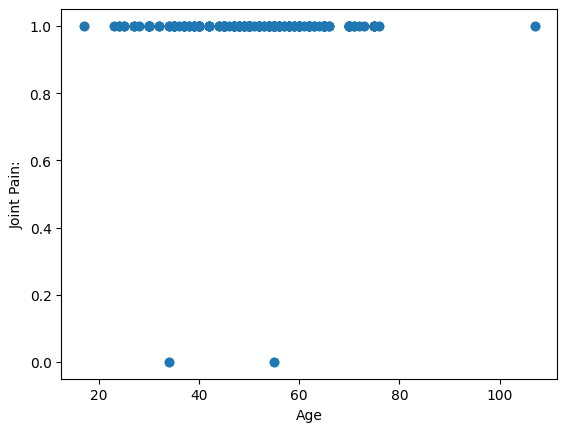

In [ ]:
plt.scatter(data = df, x = 'Age', y = 'Joint Pain:');
plt.xlabel('Age');
plt.ylabel('Joint Pain:');

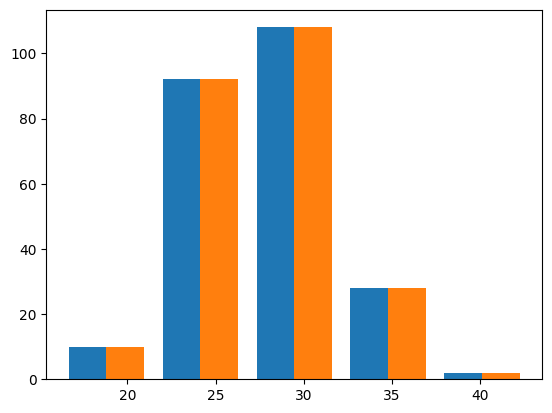

In [ ]:
plt.hist(data = df, x = 'BMI:', bins = 5);

In [ ]:
df.to_excel("modified_aSAFsddsdata.xlsx", index=False)

                                Joint Pain:    Gender       Age  \
Joint Pain:                        1.000000 -0.009213  0.047640   
Gender                            -0.009213  1.000000  0.338484   
Age                                0.047640  0.338484  1.000000   
Menopause Age                           NaN       NaN  0.541853   
height  (meter)                   -0.089897  0.631198  0.061880   
Weight (KG)                       -0.109776  0.127718  0.028611   
Smoker                             0.041609  0.501811  0.268183   
Alcoholic                               NaN       NaN       NaN   
Diabetic                           0.021031  0.023057  0.140322   
Hypothyroidism                     0.037242 -0.103278 -0.066935   
Number of Pregnancies              0.027378  0.034347  0.354044   
Seizer Disorder                    0.017023 -0.167968 -0.087289   
Estrogen Use                       0.020091 -0.198246 -0.092544   
Dialysis:                          0.005930  0.071512 -0.06699

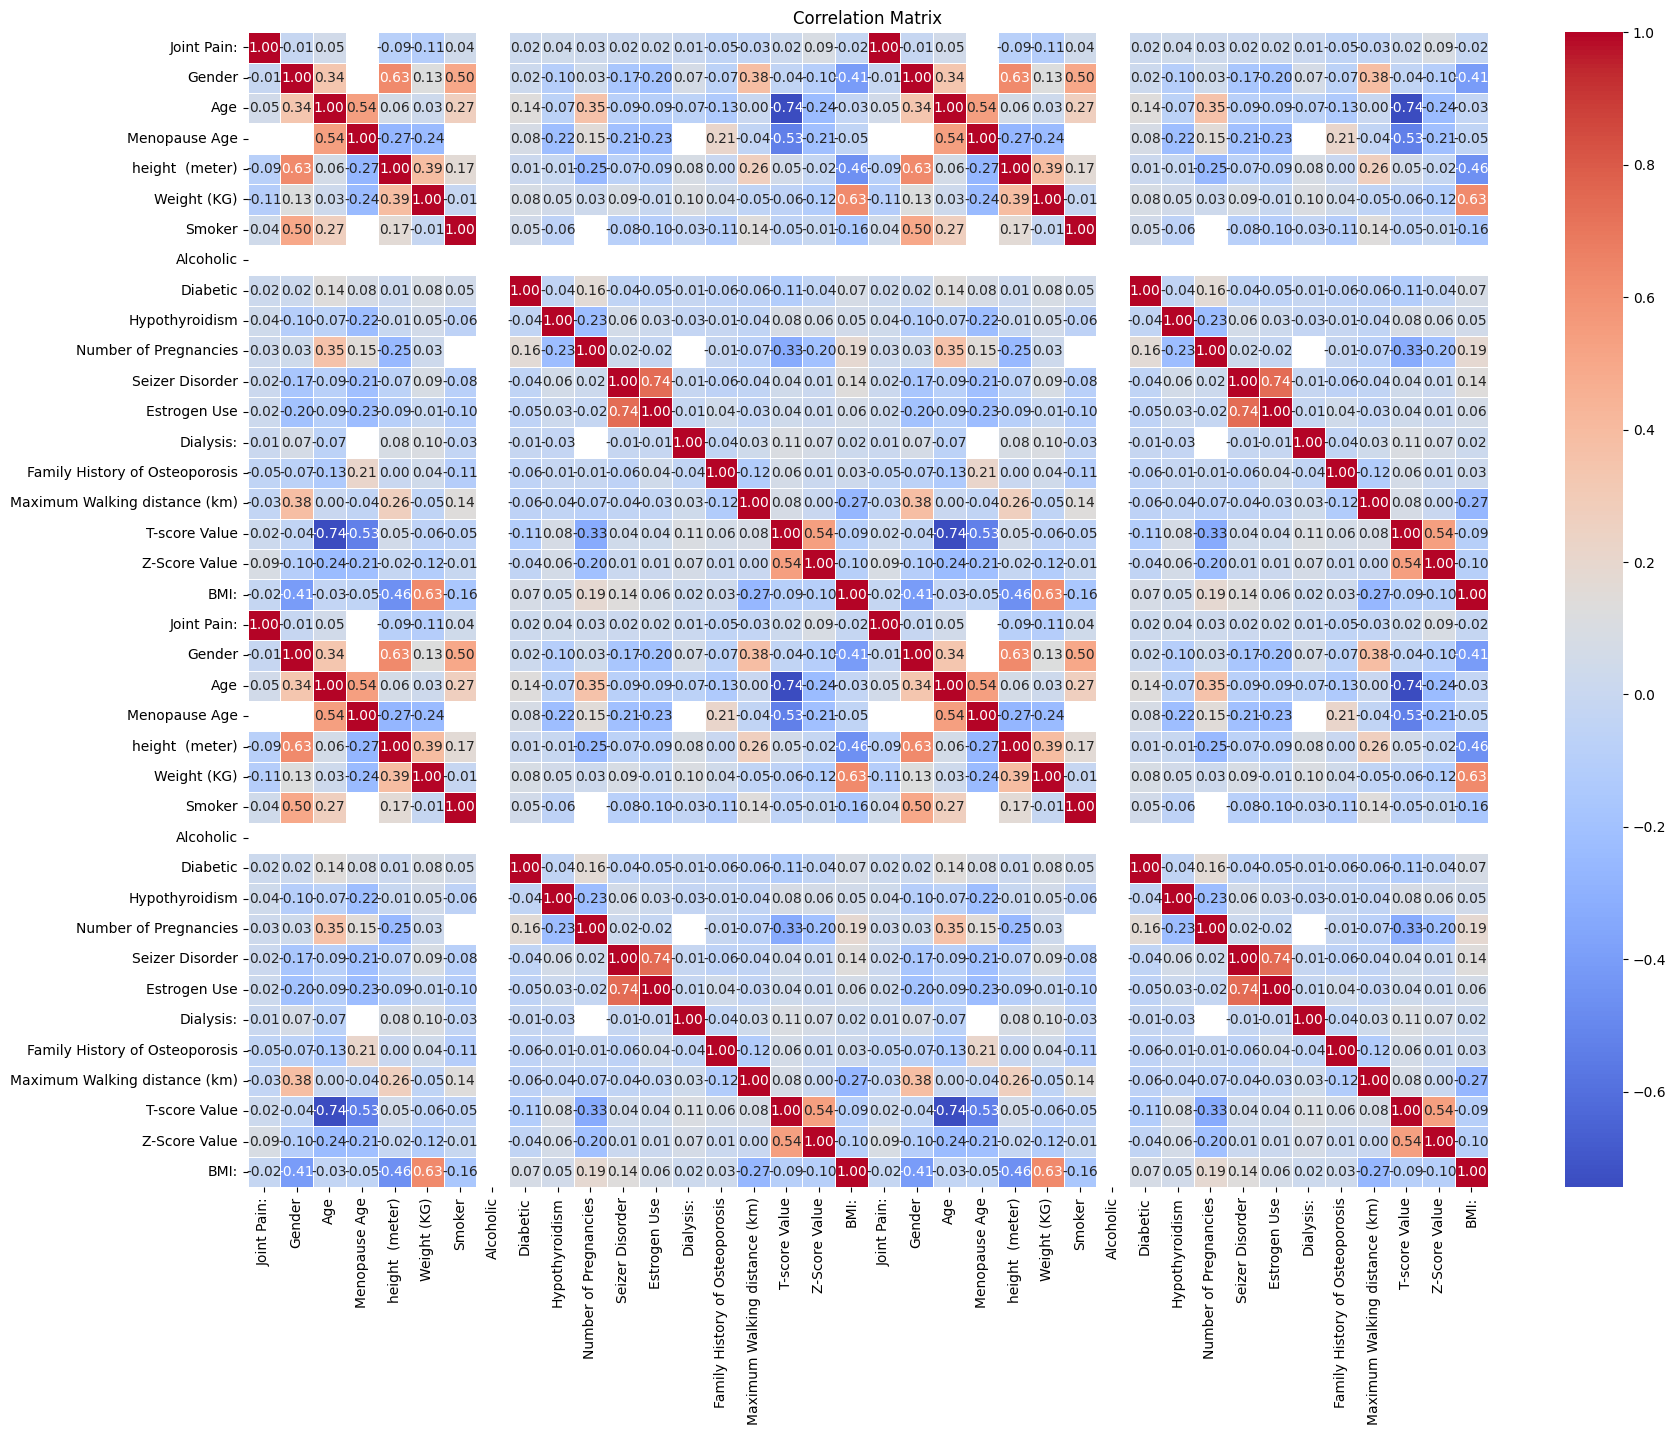

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df.corr()


print(correlation_matrix)

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
|

SyntaxError: invalid syntax (<ipython-input-18-4b37ef281455>, line 1)